<a href="https://colab.research.google.com/github/fredericmenezes/EDA-Airbnb-Rio-de-Janeiro-Project/blob/main/eda_airbnb_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an insights project in which, through exploratory data analysis, the aim is to generate insights and recommend solutions to the business problem at hand.

To this end, the dataset used pertains to various types of accommodations offered through Airbnb in the city of Rio de Janeiro.

According to their own website, Airbnb "began in 2008 when two designers with extra space hosted three travelers looking for a place to stay. Now, millions of hosts and travelers choose to create a free Airbnb account so they can list their space and book unique accommodations, anywhere in the world. Additionally, Airbnb Experience hosts share their passions and interests with travelers and locals alike. Airbnb makes sharing easy, enjoyable, and safe. We verify personal profiles and listings, maintain a smart messaging system so hosts and guests can communicate with confidence, and manage a trusted platform for collecting and transferring payments."

In other words, Airbnb is an online service that makes it easier for people to book and rent accommodations in a safer and more direct manner between hosts and guests. It can encompass different types of accommodations, where often the prices are lower than those of hotels and properties booked through other means.

Source: [Airbnb](https://www.airbnb.com/help/article/2503)

In light of this, pertinent inquiries were formulated to guide the business problem. Therefore, by applying exploratory data analysis, the aim is to address the following questions:

1. What are the most offered types of accommodations and which ones have the highest revenue?

2. What are the Top 10 most expensive and cheapest accommodations?

3. Which neighborhoods have the highest number of accommodations and which ones have the highest total revenue?

4. What is the most popular price range, and which one generates the highest revenue?

5. Do Superhosts, Verified Hosts, and Hosts with the highest number of listings generate higher total revenue?

6. How does price behavior vary with the number of bathrooms, bedrooms, beds, and different types of rooms and beds?

7. Do accommodations with a higher number of reviews, guest capacity, and included guests have advantages in total revenue?

8. Do accommodations with instant booking feature yield higher gains? What is the most commonly offered length of stay?

9. What is the proportion of accommodations that offer extra guest services, and what is the average price?

10. What factors have the most influence on price?

By addressing these questions, the project can generate insights for investors, hosts, and travelers.

# Importing libraries and the dataset

In [31]:
!wget -P input https://media.githubusercontent.com/media/fredericmenezes/EDA-Airbnb-Rio-de-Janeiro-Project/main/input/listings.csv

--2023-09-24 05:28:01--  https://media.githubusercontent.com/media/fredericmenezes/EDA-Airbnb-Rio-de-Janeiro-Project/main/input/listings.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111764542 (107M) [text/plain]
Saving to: ‘input/listings.csv’

listings.csv        100%[===================>] 106.59M   266MB/s    in 0.4s    

2023-09-24 05:28:05 (266 MB/s) - ‘input/listings.csv’ saved [111764542/111764542]



In [32]:
# Input data files are available in the "./input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/listings.csv


In [33]:
# View Settings
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Dataset visualization settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

The dataset used was listings

In [34]:
# Loading data into csv file

df_l = pd.read_csv('./input/listings.csv')

# Data Exploration

In [35]:
# First lines of the Dataset
df_l.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival. Pls contact me to discuss. - Beautifu...,- large balcony which looks out on pedestrian street - no traffic - priceless in Rio (...,Pls note that special rates apply for Carnival. Pls contact me to discuss. - Beautifu...,none,This is the best spot in Rio. Everything happens here. All big events are just 1 min. ...,NaN,Excellent location. Close to all major public transportation.,"The entire apartment is yours. It's like your ""home away from home"", everything you ne...",I will be available throughout your stay should you need me.,Please leave the apartment in a clean fashion (just like you found it). No loud noise...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/30698f38_original.jpg?aki_policy=large,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil","I am a journalist/writer. Lived for 15 years in NYC. I am now based in Rio, writin...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/67b13cea-8c11-49c0-a08d-7f42c330676e.jpg?aki_...,https://a0.muscache.com/im/pictures/user/67b13cea-8c11-49c0-a08d-7f42c330676e.jpg?aki_...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Paid parking off premises"",""S...",NaN,$332.00,NaN,NaN,$0.00,$378.00,2,$63.00,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,2010-07-15,2019-11-11,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves staying there! Best location, 2 blocks t...",This newly renovated studio (last renovations Oct 2014) is in the best location of C...,"Our apartment is a l

In [36]:
# Number of rows and columns in the Dataset
df_l.shape

(33715, 106)

In [37]:
# Dataframe Columns
df_l.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [38]:
# Dataset data types
df_l.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [39]:
# Frequency of data types
df_l.dtypes.value_counts()

object     61
float64    24
int64      21
dtype: int64

In [40]:
# Unique values in each column
df_l.nunique()

id                                              33715
listing_url                                     33715
scrape_id                                           1
last_scraped                                        2
name                                            32590
summary                                         30486
space                                           19815
description                                     32052
experiences_offered                                 1
neighborhood_overview                           17225
notes                                           10045
transit                                         17167
access                                          14177
interaction                                     14777
house_rules                                     15597
thumbnail_url                                       0
medium_url                                          0
picture_url                                     33257
xl_picture_url              

In [41]:
# Duplicate fields
df_l.duplicated().sum()

0

In [42]:
# Statistical description of the entire Dataset including categorical columns
df_l.describe(include=['O']).T

,count,unique,top,freq
listing_url,33715,33715,https://www.airbnb.com/rooms/17878,1
last_scraped,33715,2,2019-11-22,32920
name,33654,32590,Apartamento em Copacabana,45
summary,31661,30486,.,82
space,20756,19815,"The apartment is amazing, spacious, quiet and comfortable. Our wifi network covers th...",50
description,32785,32052,.,24
experiences_offered,33715,1,none,33715
neighborhood_overview,18838,17225,"Copacabana, a name synonym of paradise. The wave designs near of the sea and the “calç...",27
notes,11247,10045,Intern Settlement : 1. The maximum number of tenants is the number indicated when you ...,170
transit,18739,17167,The location is very convenient to visit the neighbourhood or other parts of the city....,50


In [43]:
# Statistical description of the Dataset's numeric columns only
df_l.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.371500e+04,3.371500e+04,0.0,0.0,0.0,3.371500e+04,0.0,33695.000000,33695.000000,0.0,33715.000000,33715.000000,33715.000000,33661.000000,33673.000000,33667.000000,495.000000,33715.000000,33715.000000,3.371500e+04,33715.000000,33715.000000,3.371500e+04,3.371500e+04,33715.000000,3.371500e+04,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,33715.000000,18293.000000,18275.00000,18280.000000,18274.000000,18280.000000,18277.000000,18278.000000,0.0,33715.000000,33715.000000,33715.000000,33715.000000,19149.000000
mean,1.837737e+07,2.019112e+13,NaN,NaN,NaN,7.333110e+07,NaN,7.347559,7.347559,NaN,-22.965208,-43.254228,4.199941,1.694765,1.646126,2.574242,498.751515,1.718434,4.789826,9.571741e+02,4.677325,5.279164,9.536130e+02,9.565083e+02,4.814341,9.557378e+02,15.476553,30.368234,47.661516,177.956251,9.374344,3.524396,94.777565,9.65658,9.431565,9.802561,9.775656,9.748044,9.332093,NaN,5.996292,5.112383,0.702862,0.079638,0.707232
std,1.182836e+07,0.000000e+00,NaN,NaN,NaN,7.577773e+07,NaN,32.194777,32.194777,NaN,0.035244,0.097488,2.625252,1.508228,1.075649,2.121490,931.444840,1.585645,22.640328,5.473614e+04,21.651351,22.298511,5.473616e+04,5.473614e+04,21.762781,5.473614e+04,13.024685,24.678858,37.328647,149.766863,24.815311,8.185492,9.141386,0.88463,1.079031,0.713238,0.744620,0.734016,1.016906,NaN,20.303420,19.782263,1.475525,0.618935,0.927453
min,1.787800e+04,2.019112e+13,NaN,NaN,NaN,1.173900e+04,NaN,0.000000,0.000000,NaN,-23.073400,-43.737090,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.026686e+07,2.019112e+13,NaN,NaN,NaN,1.431560e+07,NaN,1.000000,1.000000,NaN,-22.984710,-43.323360,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000e+01,1.000000,2.000000,3.000000e+01,3.000000e+01,1.100000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,10.00000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.110000
50%,1.425308e+07,2.019112e+13,NaN,NaN,NaN,5.277714e+07,NaN,1.000000,1.000000,NaN,-22.970850,-43.200220,4.000000,1.000000,1.000000,2.000000,161.000000,1.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.300000,1.125000e+03,19.000000,34.000000,56.000000,165.000000,1.000000,0.000000,98.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.340000
75%,2.991364e+07,2.019112e+13,NaN,NaN,NaN,9.143910e+07,NaN,3.000000,3.000000,NaN,-22.946725,-43.187085,6.000000,2.000000,2.000000,3.000000,700.000000,2.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,29.000000,57.000000,87.000000,350.000000,6.000000,3.000000,100.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.980000
max,4.029091e+07,2.019112e+13,NaN,NaN,NaN,3.111796e+08,NaN,1259.000000,

In [44]:
# Null values in the Dataset
df_l.isnull().sum().sort_values(ascending=False)

host_acceptance_rate                            33715
neighbourhood_group_cleansed                    33715
jurisdiction_names                              33715
xl_picture_url                                  33715
medium_url                                      33715
thumbnail_url                                   33715
license                                         33713
square_feet                                     33220
weekly_price                                    31169
monthly_price                                   30890
notes                                           22468
access                                          17683
host_about                                      17543
interaction                                     16913
house_rules                                     16291
review_scores_checkin                           15441
review_scores_accuracy                          15440
review_scores_location                          15438
review_scores_value         

In [45]:
# Null values in the Dataset in terms of percentage
df_l.isnull().sum()/df_l.shape[0] * 100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
name                                              0.180928
summary                                           6.092244
space                                            38.436898
description                                       2.758416
experiences_offered                               0.000000
neighborhood_overview                            44.125760
notes                                            66.640961
transit                                          44.419398
access                                           52.448465
interaction                                      50.164615
house_rules                                      48.319739
thumbnail_url                                   100.000000
medium_url                                      100.0000

# Data Cleansing

Null values

In [46]:
# Columns with less than 10% null values
df_l.isnull().sum()/df_l.shape[0] * 100 < 10

id                                               True
listing_url                                      True
scrape_id                                        True
last_scraped                                     True
name                                             True
summary                                          True
space                                           False
description                                      True
experiences_offered                              True
neighborhood_overview                           False
notes                                           False
transit                                         False
access                                          False
interaction                                     False
house_rules                                     False
thumbnail_url                                   False
medium_url                                      False
picture_url                                      True
xl_picture_url              

NOTE: With this, we will exclude columns that contain more than 10% of null values:

In [47]:
# Maximum value of nulls allowed
max_nulo = 31401 * 10 / 100 # 31401 is the number of rows in the dataset
max_nulo

3140.1

In [48]:
# Remove all columns that have more than 10% null values
max_nulo = 3140.1
df_l = df_l.loc[:, (df_l.isnull().sum(axis=0) < max_nulo)]
df_l.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,description,experiences_offered,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival. Pls contact me to discuss. - Beautifu...,Pls note that special rates apply for Carnival. Pls contact me to discuss. - Beautifu...,none,https://a0.muscache.com/im/pictures/65320518/30698f38_original.jpg?aki_policy=large,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",t,https://a0.muscache.com/im/pictures/user/67b13cea-8c11-49c0-a08d-7f42c330676e.jpg?aki_...,https://a0.muscache.com/im/pictures/user/67b13cea-8c11-49c0-a08d-7f42c330676e.jpg?aki_...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Paid parking off premises"",""S...",$332.00,2,$63.00,4,30,4,4,30,30,4.0,30.0,a week ago,t,23,31,35,303,2019-11-22,243,27,f,t,f,strict_14_with_grace_period,f,f,1,1,0,0
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves staying there! Best location, 2 blocks t...","Our apartment is a little gem, everyone loves staying there! Best location, 2 blocks t...",none,https://a0.muscache.com/im/pictures/3003965/68ebb634_original.jpg?aki_policy=large,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",f,https://a0.muscache.com/im/pictures/user/9e204f80-1667-448b-b5a3-4dec677060f4.jpg?aki_...,https://a0.muscache.com/im/pictures/user/9e204f80-1667-448b-b5a3-4dec677060f4.jpg?aki_...,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'governmen...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,22060-020,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.97712,-43.19045,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,Doorman,Elevator,""Buzzer/wirel...",$160.00,2,$45.00,7,60,7,7,60,60,7.0,60.0,5 weeks ago,t,16,22,35,119,2019-11-22,235,17,f,f,f,strict_14_with_grace_period,t,t,3,3,0,0


In [49]:
# Dataset size after columns are deleted
df_l.shape

(33715, 73)

In [50]:
# Remaining columns
df_l.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm

In [51]:
# Null values columns
df_l.isnull().sum().sort_values(ascending=False)

summary                                         2054
neighbourhood                                   1958
zipcode                                         1705
description                                      930
host_location                                    193
city                                              82
name                                              61
bathrooms                                         54
beds                                              48
state                                             47
market                                            45
bedrooms                                          42
host_listings_count                               20
host_identity_verified                            20
host_has_profile_pic                              20
host_total_listings_count                         20
host_picture_url                                  20
host_thumbnail_url                                20
host_is_superhost                             

## Selection of trivial columns for business

Exclude all columns that are initially assumed to be irrelevant to the business question by reading the data dictionary found on the website: [http://insideairbnb.com/](http://insideairbnb.com/rio-de-janeiro)

In [52]:
# Delete all columns except these.
df_l = df_l.drop(df_l.columns.difference(['id', 'name', 'host_id','host_is_superhost', 'host_identity_verified',
                                          'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
                                          'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                                          'price', 'guests_included', 'extra_people', 'minimum_nights',
                                          'number_of_reviews', 'instant_bookable', 'calculated_host_listings_count'
                                         ]), 1)

In [53]:
# Check changes
df_l.head(5)

,id,name,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,t,t,Copacabana,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,$332.00,2,$63.00,4,243,t,1
1,25026,Beautiful Modern Decorated Studio in Copa,102840,f,t,Copacabana,-22.97712,-43.19045,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$160.00,2,$45.00,7,235,f,3
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,t,t,Ipanema,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$273.00,2,$42.00,2,271,t,1
3,35636,Cosy flat close to Ipanema beach,153232,t,t,Ipanema,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,$378.00,2,$63.00,2,169,f,1
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,t,t,Copacabana,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$130.00,2,$80.00,3,316,f,1


In [54]:
# Dataset size after changes
df_l.shape

(33715, 22)

In [55]:
# Leftover null values
df_l.isnull().sum().sort_values(ascending=False)

name                              61
bathrooms                         54
beds                              48
bedrooms                          42
host_is_superhost                 20
host_identity_verified            20
instant_bookable                   0
number_of_reviews                  0
minimum_nights                     0
extra_people                       0
guests_included                    0
price                              0
bed_type                           0
id                                 0
accommodates                       0
room_type                          0
property_type                      0
longitude                          0
latitude                           0
neighbourhood_cleansed             0
host_id                            0
calculated_host_listings_count     0
dtype: int64

Replace null values with the median in numerical variables and with the mode in categorical variables. **NOTE**: we chose the median instead of the average in order to avoid outliers.

In [56]:
# Listing categorical and numeric columns:
v_c = list(df_l.select_dtypes(include=['object']).columns)
v_n = list(df_l.select_dtypes(include=['float64', 'int64']).columns)
print('Categorical Variables:', v_c)
print('Numeric Variables:', v_n)

Categorical Variables: ['name', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'price', 'extra_people', 'instant_bookable']
Numeric Variables: ['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']


In [57]:
# Replace null values with mode in 'host_identity_verified' column
moda_host_identity_verified  = sts.mode(df_l['host_identity_verified'])
moda_host_identity_verified
df_l['host_identity_verified'].fillna(moda_host_identity_verified , inplace=True)

In [58]:
# Checks if there are still null values in the 'host_identity_verified' column
df_l['host_identity_verified'].isnull().sum()

0

In [59]:
# Leftover null values
df_l.isnull().sum().sort_values(ascending=False)

name                              61
bathrooms                         54
beds                              48
bedrooms                          42
host_is_superhost                 20
instant_bookable                   0
number_of_reviews                  0
minimum_nights                     0
extra_people                       0
guests_included                    0
price                              0
bed_type                           0
id                                 0
accommodates                       0
room_type                          0
property_type                      0
longitude                          0
latitude                           0
neighbourhood_cleansed             0
host_identity_verified             0
host_id                            0
calculated_host_listings_count     0
dtype: int64

Delete all remaining null values as this is very specific information and it is not appropriate to replace it.

In [60]:
# Delete all rows that contain null values
df_l = df_l.dropna()
df_l.head(6)

,id,name,host_id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,t,t,Copacabana,-22.96592,-43.17896,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,$332.00,2,$63.00,4,243,t,1
1,25026,Beautiful Modern Decorated Studio in Copa,102840,f,t,Copacabana,-22.97712,-43.19045,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$160.00,2,$45.00,7,235,f,3
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,t,t,Ipanema,-22.98302,-43.21427,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$273.00,2,$42.00,2,271,t,1
3,35636,Cosy flat close to Ipanema beach,153232,t,t,Ipanema,-22.98816,-43.19359,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,$378.00,2,$63.00,2,169,f,1
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,t,t,Copacabana,-22.98127,-43.19046,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$130.00,2,$80.00,3,316,f,1
5,35893,Copa Tabajaras,154043,f,t,Copacabana,-22.96681,-43.18657,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$151.00,1,$150.00,2,1,f,1


In [61]:
# Check if there are still null values
df_l.isnull().sum().sort_values(ascending=False)

id                                0
name                              0
instant_bookable                  0
number_of_reviews                 0
minimum_nights                    0
extra_people                      0
guests_included                   0
price                             0
bed_type                          0
beds                              0
bedrooms                          0
bathrooms                         0
accommodates                      0
room_type                         0
property_type                     0
longitude                         0
latitude                          0
neighbourhood_cleansed            0
host_identity_verified            0
host_is_superhost                 0
host_id                           0
calculated_host_listings_count    0
dtype: int64

In [62]:
# Number of rows and columns in the Dataset after changes
df_l.shape

(33524, 22)

In [63]:
# Remaining columns
df_l.columns

Index(['id', 'name', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count'],
      dtype='object')

## Outliers

In [64]:
# Brief statistical description of quantitative data
df_l.describe().T

,count,mean,std,min,25%,50%,75%,max
id,33524.0,1.840306e+07,1.180409e+07,17878.00000,1.033744e+07,1.426206e+07,2.991495e+07,4.029091e+07
host_id,33524.0,7.347135e+07,7.577501e+07,11739.00000,1.433502e+07,5.307590e+07,9.165402e+07,3.111796e+08
latitude,33524.0,-2.296528e+01,3.521791e-02,-23.07340,-2.298472e+01,-2.297089e+01,-2.294705e+01,-2.275038e+01
longitude,33524.0,-4.325423e+01,9.748268e-02,-43.73709,-4.332358e+01,-4.320016e+01,-4.318708e+01,-4.310406e+01
accommodates,33524.0,4.203257e+00,2.626673e+00,1.00000,2.000000e+00,4.000000e+00,6.000000e+00,1.600000e+02
bathrooms,33524.0,1.695338e+00,1.509548e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+02
bedrooms,33524.0,1.646373e+00,1.076064e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+01
beds,33524.0,2.575737e+00,2.123297e+00,0.00000,1.000000e+00,2.000000e+00,3.000000e+00,6.900000e+01
guests_included,33524.0,1.721334e+00,1.588754e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.500000e+01
minimum_nights,33524.0,4.793491e+00,2.269561e+01,1.00000,1.000000e+00,2.000000e+00,4.000000e+00,1.123000e+03


In [65]:
# General information about columns
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33524 entries, 0 to 33714
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33524 non-null  int64  
 1   name                            33524 non-null  object 
 2   host_id                         33524 non-null  int64  
 3   host_is_superhost               33524 non-null  object 
 4   host_identity_verified          33524 non-null  object 
 5   neighbourhood_cleansed          33524 non-null  object 
 6   latitude                        33524 non-null  float64
 7   longitude                       33524 non-null  float64
 8   property_type                   33524 non-null  object 
 9   room_type                       33524 non-null  object 
 10  accommodates                    33524 non-null  int64  
 11  bathrooms                       33524 non-null  float64
 12  bedrooms                        

The numeric column "price" does not appear as it is in object format. Let's transform it to the float type.

In [66]:
# Remove the $ symbol from the 'price' column and transform it into a float
df_l['price'] = df_l['price'].astype(str).str.replace("$", "").str.replace(',', '', regex = 'true').astype(float)

**NOTE**: Transform the "beds" columns into integers

In [67]:
# Conversion to integer in the "beds" column
df_l['beds'] = df_l['beds'].astype(int)

In [68]:
# Check changes applied to columns
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33524 entries, 0 to 33714
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33524 non-null  int64  
 1   name                            33524 non-null  object 
 2   host_id                         33524 non-null  int64  
 3   host_is_superhost               33524 non-null  object 
 4   host_identity_verified          33524 non-null  object 
 5   neighbourhood_cleansed          33524 non-null  object 
 6   latitude                        33524 non-null  float64
 7   longitude                       33524 non-null  float64
 8   property_type                   33524 non-null  object 
 9   room_type                       33524 non-null  object 
 10  accommodates                    33524 non-null  int64  
 11  bathrooms                       33524 non-null  float64
 12  bedrooms                        

In [ ]:
# Brief statistical description of numeric columns
df_l.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31206.0,3.187550e+17,3.799154e+17,17878.000000,2.051588e+07,5.092624e+07,7.498427e+17,9.220117e+17
host_id,31206.0,1.614024e+08,1.642413e+08,1671.000000,2.185199e+07,8.519854e+07,2.925903e+08,5.219198e+08
latitude,31206.0,-2.296744e+01,3.524498e-02,-23.073276,-2.298481e+01,-2.297283e+01,-2.295580e+01,-2.274969e+01
longitude,31206.0,-4.325092e+01,1.001649e-01,-43.723009,-4.330941e+01,-4.319578e+01,-4.318595e+01,-4.310440e+01
accommodates,31206.0,4.057681e+00,2.364347e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01
beds,31206.0,2.506633e+00,2.141091e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,9.100000e+01
price,31206.0,8.537591e+02,7.307011e+03,33.000000,1.900000e+02,3.140000e+02,6.000000e+02,5.476430e+05
minimum_nights,31206.0,4.662757e+00,2.331473e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.125000e+03
number_of_reviews,31206.0,1.913808e+01,3.967740e+01,0.000000,1.000000e+00,4.000000e+00,1.900000e+01,6.030000e+02
calculated_host_listings_count,31206.0,9.878837e+00,2.835526e+01,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,2.250000e+02


<Figure size 1600x1800 with 0 Axes>

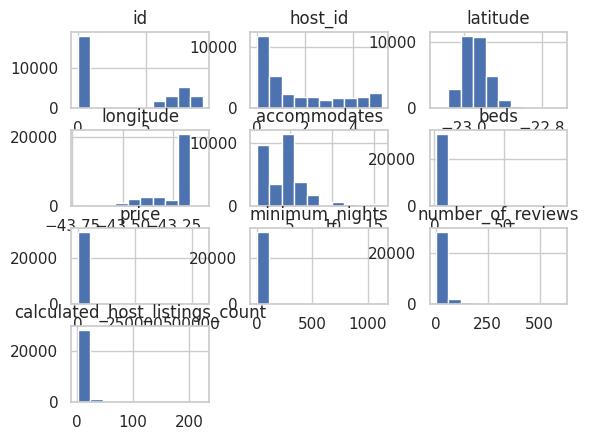

In [ ]:
# Histogram of all numeric columns
sns.set(style="whitegrid")
plt.figure(figsize = (16,18))
df_l.hist()
plt.show();

# Data visualization

Due to its trivial relevance to the business question, let's start by analyzing the Price column